# Crop Recommendation System Using ML Model

##### AIM :- The aim of this project is to develop a Machine Learning-based Crop Recommendation Model that predicts the most suitable crop for cultivation based on key soil and environmental parameters. The model utilizes the following features to provide accurate recommendations:

- N (Nitrogen): The ratio of nitrogen content in the soil, measured in kg/ha, essential for assessing soil fertility and crop nutrient requirements.
- P (Phosphorous): The ratio of phosphorous content in the soil, measured in kg/ha, crucial for root development and energy transfer in plants.
- K (Potassium): The ratio of potassium content in the soil, measured in kg/ha, important for improving plant immunity and quality.
- Temperature: The ambient temperature, measured in degrees Celsius, which influences crop growth and development.
- Humidity: The relative humidity, measured as a percentage, which affects water availability and plant respiration.
- pH: The pH value of the soil, indicating its acidity or alkalinity, which determines nutrient availability and suitability for 
  different crops.
- Rainfall: The amount of rainfall, measured in mm, which impacts soil moisture levels and crop water requirements.
##### The goal of the model is to assist farmers and agricultural experts in optimizing crop selection to maximize yield, reduce resource wastage, and ensure sustainable farming practices. By leveraging historical data and machine learning algorithms, the model aims to provide data-driven, actionable insights for modern agriculture.

## 1. Import Required libraries

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## 2. Importing dataset

In [127]:
cropdf = pd.read_csv(r"A:\MTECH(Data Science)\DataSet\Crop Recommendation System\Crop_recommendation.csv")
cropdf.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## 3. About DataSet

In [128]:
cropdf.shape

(2200, 8)

In [129]:
print('List of Columns',cropdf.columns)

List of Columns Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [130]:
print("Number of various crops: ", len(cropdf['label'].unique()))
print("List of crops: ", cropdf['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [131]:
cropdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

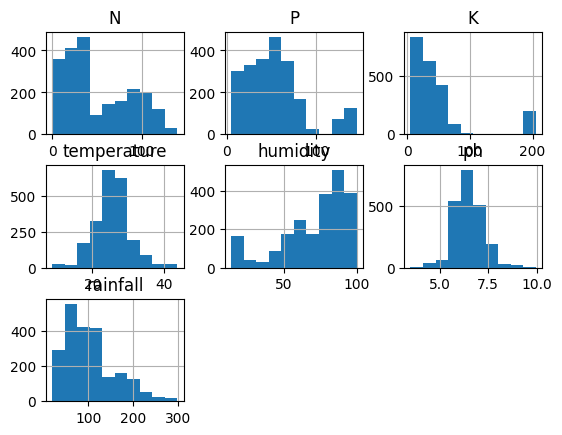

In [132]:
cropdf.hist()

## 4. Checking Null and NA values in DataSet

In [133]:
cropdf.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## 5. Apply label encoder in the target column

In [134]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoder to the target column
cropdf['label'] = label_encoder.fit_transform(cropdf['label'])

# Display the DataFrame with encoded target
print(cropdf)

# If you want to check the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

        N   P   K  temperature   humidity        ph    rainfall  label
0      90  42  43    20.879744  82.002744  6.502985  202.935536     20
1      85  58  41    21.770462  80.319644  7.038096  226.655537     20
2      60  55  44    23.004459  82.320763  7.840207  263.964248     20
3      74  35  40    26.491096  80.158363  6.980401  242.864034     20
4      78  42  42    20.130175  81.604873  7.628473  262.717340     20
...   ...  ..  ..          ...        ...       ...         ...    ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507      5
2196   99  15  27    27.417112  56.636362  6.086922  127.924610      5
2197  118  33  30    24.131797  67.225123  6.362608  173.322839      5
2198  117  32  34    26.272418  52.127394  6.758793  127.175293      5
2199  104  18  30    23.603016  60.396475  6.779833  140.937041      5

[2200 rows x 8 columns]
Label Mapping: {'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7

## 6. Split or Extract independent and target(Dependent) variables From dataset

In [135]:
X = cropdf.drop('label', axis=1)
y = cropdf['label']

In [136]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [137]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

## 7. Split dataset For training and testing

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,
                                                    shuffle = True, random_state = 0)

In [139]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1567,27,120,200,21.452787,90.745319,6.110219,116.703658
2031,81,36,38,23.765547,87.983299,6.334838,150.316615
2073,90,59,35,24.251335,89.864541,7.098228,175.174211
1374,81,16,45,26.904357,86.254262,6.727468,59.759800
279,47,80,77,17.182484,16.428918,7.561108,72.850173
...,...,...,...,...,...,...,...
1033,102,71,48,28.654563,79.286937,5.695268,102.463378
1731,34,68,51,27.347349,94.177567,6.687088,40.351531
763,35,64,15,28.474423,63.536045,6.500145,69.527441
835,39,65,23,25.434598,69.126134,7.685959,41.026829


In [140]:
Y_train

1567     0
2031     8
2073     8
1374    21
279      3
        ..
1033     1
1731    17
763      2
835     10
1653    16
Name: label, Length: 1760, dtype: int32

## 8. Building ML Model
- KNN
- Decsion tree
- Logistic regression
- Random Forest
- SVM
- NBC
- lightgbm
- XGBoost

In [141]:
def models(X_train, Y_train):
    # 1. K-Nearest Neighbors
    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knc.fit(X_train, Y_train)

    # 2. Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=0, criterion="entropy")
    dtc.fit(X_train, Y_train)

    # 3. Logistic Regression
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state=0)
    lr.fit(X_train, Y_train)

    # 4. Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    rfc.fit(X_train, Y_train)

    # 5. Support Vector Machine
    from sklearn.svm import SVC
    svc = SVC(random_state=0)
    svc.fit(X_train, Y_train)

    # 6. Naive Bayes Classifier
    from sklearn.naive_bayes import GaussianNB
    nbc = GaussianNB()
    nbc.fit(X_train, Y_train)
    
    # 7. LightGBM
    from lightgbm import LGBMClassifier
    LGBMC = LGBMClassifier(random_state=0, n_estimators=100, max_depth=6, num_leaves=2**6 - 1, boosting_type='gbdt')
    LGBMC.fit(X_train, Y_train)
    
    # 8. XGBoost
    from xgboost import XGBClassifier
    xgbc = XGBClassifier(random_state=0, eval_metric='mlogloss', n_estimators=100)
    xgbc.fit(X_train, Y_train)

    print('[0] K-Nearest Neighbors accuracy:', knc.score(X_train, Y_train))
    print('[1] Decision Tree accuracy:', dtc.score(X_train, Y_train))
    print('[2] Logistic Regression accuracy:', lr.score(X_train, Y_train))
    print('[3] Random Forest accuracy:', rfc.score(X_train, Y_train))
    print('[4] Support Vector Machine accuracy:', svc.score(X_train, Y_train))
    print('[5] Naive Bayes Classifier accuracy:', nbc.score(X_train, Y_train))
    print('[6] LightGBM accuracy:', LGBMC.score(X_train, Y_train))
    print('[7] XGBoost accuracy:', xgbc.score(X_train, Y_train))

    return knc, dtc, lr, rfc, svc, nbc, LGBMC, xgbc
model = models(X_train,Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.030418
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] 

## 8. Model Prediction
 - Naive Bayes Classifier has the highest accuracy so we will predict new input by NBC 

In [142]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()

In [143]:
model1.fit(X_train, Y_train)

GaussianNB()

In [144]:
y_pred = model1.predict(X_test)

## (9). Function to predict new data

In [151]:
cropdf

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:

# Define the prediction function
def predict_new_data(N, P, K, T, H, PH, R):
    # Create a new DataFrame with the provided input features
    new_data = pd.DataFrame({
        'N': [N],
        'P': [P],
        'K': [K],
        'temperature': [T],
        'humidity': [H],
        'ph': [PH],
        'rainfall': [R]
    })
    # Predict using the model (assumes 'model1' is pre-trained and available)
    prediction = model1.predict(new_data)
    predicted_class = prediction[0]
    return predicted_class

# Example: Predicting for new input data
N = float(input("Enter value for N (Nitrogen): "))
P = float(input("Enter value for P (Phosphorous): "))
K = float(input("Enter value for K (Potassium): "))
T = float(input("Enter value for temperature: "))
H = float(input("Enter value for humidity: "))
PH = float(input("Enter value for pH: "))
R = float(input("Enter value for rainfall: "))

# Call the prediction function
predicted_class = predict_new_data(N, P, K, T, H, PH, R)

# Print the prediction result
print(f"The predicted class for the input data is: {predicted_class}")


In [158]:
prediction = model1.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
predicted_class = prediction[0]
print(f"For Given Entry Recommended Crop Will Be: {predicted_class}")

For Given Entry Recommended Crop Will Be: 8


In [159]:
newdata=model1.predict([[90,42,43,20.879744,82.002744,6.502985,202.935536]])
newdata

array([20])

# *************************************************************************

# About Me:-
## Name - Aatish Kumar Baitha
  - M.Tech(Data Science)
- YouTube
  - https://www.youtube.com/@EngineeringWithAatish/playlists
- My Linkedin Profile 
  - https://www.linkedin.com/in/aatish-kumar-baitha-ba9523191
- My Blog
  - https://computersciencedatascience.blogspot.com/
- My Github Profile
  - https://github.com/Aatishkb

# Thank you!

# *************************************************************************